### Importing Relevant Liberaries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from prettytable import PrettyTable
# Import the scaling module
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [3]:
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

### Extract the data from the csv

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/NijatZeynalov/Predict-House-Price-using-ANNs/master/kc_house_dataset.csv")

In [5]:
# ANALYZING DATA
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
# Getting total no. of Rows and columns
data.shape

(21613, 21)

In [7]:
# Describing Data Statistcs
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [8]:
# Selecting limited number of Features on basic knowledge and including others as well if needed in future
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [10]:
FullData = data[selected_features]
FullData['price'] = data['price']
FullData.head(5)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,3,1.00,1180,5650,1.0,1180,0,221900.0
1,3,2.25,2570,7242,2.0,2170,400,538000.0
2,2,1.00,770,10000,1.0,770,0,180000.0
3,4,3.00,1960,5000,1.0,1050,910,604000.0
4,3,2.00,1680,8080,1.0,1680,0,510000.0


# PREPROCESSING

### Exploring the descriptive statistics of the variables¶

In [11]:
FullData.describe(include='all')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,7.700000e+06


In [12]:
data = FullData.copy()

In [13]:
# NOW the question arise
# 1. Do you think any house with NO or 0 bedrooms ?
# 2. Or How can be 33 Bedroom present in the house if it is not HAVELI :-p ?? Funny right...now we need to deal with those OUTLIERS also.

### Total missing values

In [14]:
data.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64

In [15]:
# Great we have no null values...Data engineer done very well done job here.. :-P 

### EXPLORING THE PDF

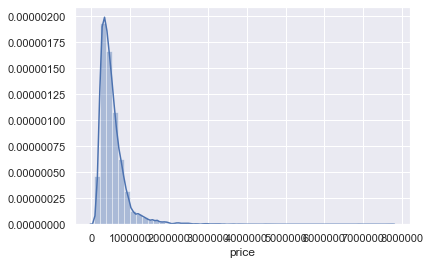

In [16]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['price'])

In [17]:
# WE CAN SEE TO MANY OUTLIERS IN PRICE, SO WE NEED TO GET RID OFF IT

### DEALING WITH OUTLIERS

In [18]:
# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

In [19]:
data['price'].quantile(0.95)

1156479.9999999974

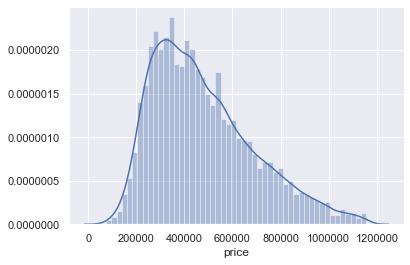

In [20]:
q = data['price'].quantile(0.95)
data_no_outlier_price = data[data['price'] < q]
sns.distplot(data_no_outlier_price['price'])

In [21]:
# LOOKS LIKE LEFT SKEW RIGHT ??

In [22]:
data_no_outlier_price.describe(include="all")

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,20532.000000,20532.000000,20532.000000,2.053200e+04,20532.000000,20532.000000,20532.000000,2.053200e+04
mean,3.332018,2.054622,1981.007160,1.466953e+04,1.476719,1712.650010,268.357150,4.790980e+05
std,0.914429,0.714038,782.339866,4.018539e+04,0.536903,733.236583,410.554601,2.113950e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,7.500000e+04
25%,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,1180.000000,0.000000,3.150000e+05
50%,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,1520.000000,0.000000,4.388500e+05
75%,4.000000,2.500000,2440.000000,1.035000e+04,2.000000,2110.000000,520.000000,6.050000e+05
max,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,7320.000000,2720.000000,1.156000e+06


In [23]:
# NOW WE WILL GO for OTHER VARIABLES

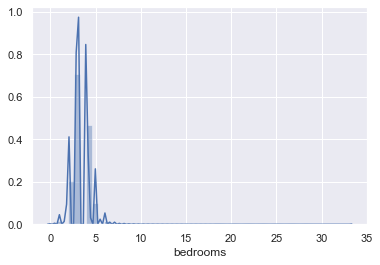

In [24]:
sns.distplot(data_no_outlier_price['bedrooms'])

In [25]:
# Hmm... Outlier there also

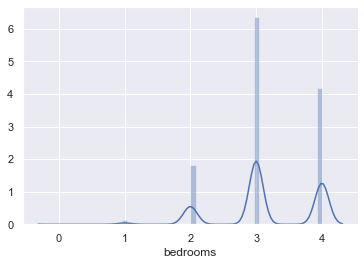

In [26]:
q = data_no_outlier_price['bedrooms'].quantile(0.97)
data_no_outlier_price_bedrooms = data_no_outlier_price[data_no_outlier_price['bedrooms'] < q]
sns.distplot(data_no_outlier_price_bedrooms['bedrooms'])

In [27]:
# remember we saw bedroom with 0, we need to deal with that also

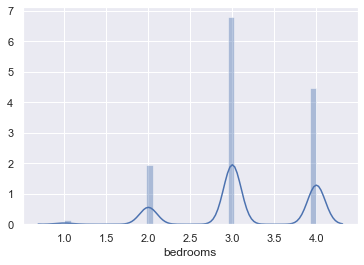

In [28]:
q2 = data_no_outlier_price_bedrooms['bedrooms'].quantile(0.0001)
data_no_outlier_price_bedrooms2 = data_no_outlier_price_bedrooms[data_no_outlier_price_bedrooms['bedrooms'] > q2]
sns.distplot(data_no_outlier_price_bedrooms2['bedrooms'])

In [29]:
data_no_outlier_price_bedrooms2.describe(include='all')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,18892.000000,18892.000000,18892.000000,1.889200e+04,18892.000000,18892.000000,18892.000000,1.889200e+04
mean,3.169966,2.001244,1907.863117,1.453006e+04,1.471708,1669.756246,238.106871,4.693154e+05
std,0.702666,0.680521,734.656444,3.996014e+04,0.540662,704.114130,377.663270,2.067280e+05
min,1.000000,0.000000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,7.500000e+04
25%,3.000000,1.500000,1360.000000,5.000000e+03,1.000000,1150.000000,0.000000,3.100000e+05
50%,3.000000,2.000000,1800.000000,7.465500e+03,1.000000,1480.000000,0.000000,4.300000e+05
75%,4.000000,2.500000,2340.000000,1.022700e+04,2.000000,2040.000000,452.500000,5.900000e+05
max,4.000000,5.250000,6050.000000,1.651359e+06,3.500000,5710.000000,2720.000000,1.156000e+06


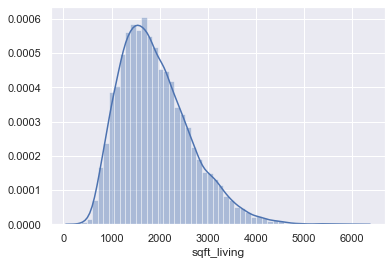

In [30]:
sns.distplot(data_no_outlier_price_bedrooms2['sqft_living'])

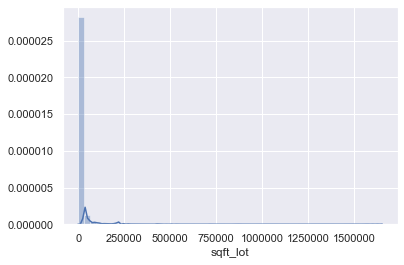

In [31]:
sns.distplot(data_no_outlier_price_bedrooms2['sqft_lot'])

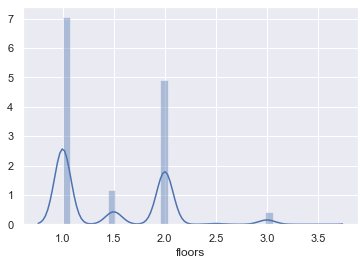

In [32]:
sns.distplot(data_no_outlier_price_bedrooms2['floors'])

In [33]:
# Rest of the other variable looks great, for now we dont need to deal with them....if needed, we will tune them later

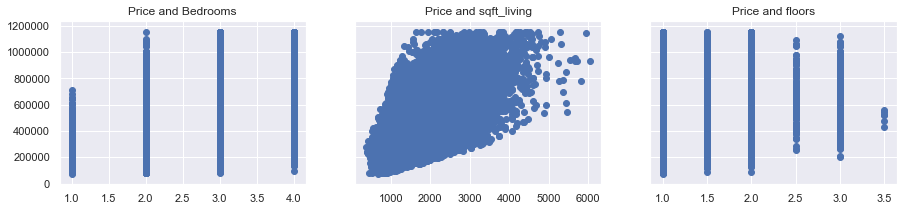

In [34]:
# Here we decided to use some matplotlib code, without explaining it
# WE can simply use plt.scatter() for each of them (with our current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_no_outlier_price_bedrooms2['bedrooms'],data_no_outlier_price_bedrooms2['price'])
ax1.set_title('Price and Bedrooms')
ax2.scatter(data_no_outlier_price_bedrooms2['sqft_living'],data_no_outlier_price_bedrooms2['price'])
ax2.set_title('Price and sqft_living')
ax3.scatter(data_no_outlier_price_bedrooms2['floors'],data_no_outlier_price_bedrooms2['price'])
ax3.set_title('Price and floors')


plt.show()

In [35]:
newdata = data_no_outlier_price_bedrooms2.copy()

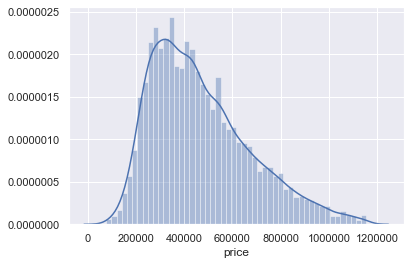

In [36]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(newdata['price'])

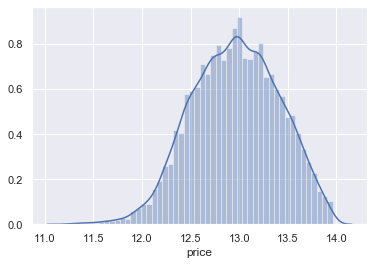

In [37]:
# Let's transform 'Price' with a log transformation
log_price = np.log(newdata['price'])
sns.distplot(log_price)

In [ ]:
# [3,1,1180,5650,1180,0]

In [38]:
newdata['logged_price'] = log_price
final_clean_data = newdata.copy()
final_clean_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price,logged_price
0,3,1.00,1180,5650,1.0,1180,0,221900.0,12.309982
1,3,2.25,2570,7242,2.0,2170,400,538000.0,13.195614
2,2,1.00,770,10000,1.0,770,0,180000.0,12.100712
3,4,3.00,1960,5000,1.0,1050,910,604000.0,13.311329
4,3,2.00,1680,8080,1.0,1680,0,510000.0,13.142166
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,360000.0,12.793859
21609,4,2.50,2310,5813,2.0,2310,0,400000.0,12.899220
21610,2,0.75,1020,1350,2.0,1020,0,402101.0,12.904459
21611,3,2.50,1600,2388,2.0,1600,0,400000.0,12.899220


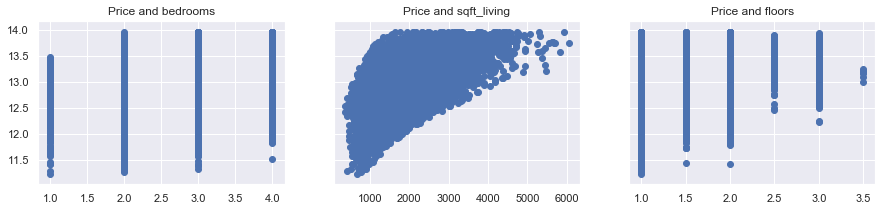

In [39]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(final_clean_data['bedrooms'],final_clean_data['logged_price'])
ax1.set_title('Price and bedrooms')
ax2.scatter(final_clean_data['sqft_living'],final_clean_data['logged_price'])
ax2.set_title('Price and sqft_living')
ax3.scatter(final_clean_data['floors'],final_clean_data['logged_price'])
ax3.set_title('Price and floors')


plt.show()

### MULTICOLLINEARITY

In [40]:
# Let's quickly see the columns of our data frame
final_clean_data.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'price', 'logged_price'],
      dtype=object)

In [41]:
# sklearn does not have a built-in way to check for multicollinearity
# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = final_clean_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]


In [42]:
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [43]:
vif

,VIF,Features
0,14.817726,bedrooms
1,18.495530,bathrooms
2,inf,sqft_living
3,1.179331,sqft_lot
4,inf,sqft_above
5,inf,sqft_basement


In [44]:
# Since bathrooms has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# data_no_multicollinearity = final_clean_data.copy() #<<TESTING PURPOSE
data_no_multicollinearity = final_clean_data.drop(['bathrooms'],axis=1)
data_preprocessed = data_no_multicollinearity.copy()

## HEAT MAP 


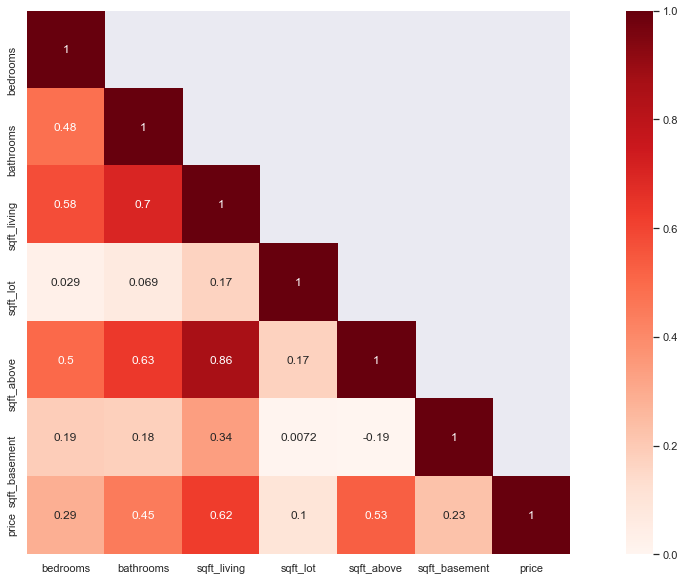

In [45]:
final_clean_data.head()
matrix = final_clean_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','price']].corr()
heat = np.array(matrix)

heat[np.tril_indices_from(heat)] = False

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

## REGRESSION MODELS

In [69]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['logged_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['logged_price'],axis=1)
inputs = inputs.drop(['price'],axis=1)
inputs.head()

,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1180,5650,1.0,1180,0
1,3,2570,7242,2.0,2170,400
2,2,770,10000,1.0,770,0
3,4,1960,5000,1.0,1050,910
4,3,1680,8080,1.0,1680,0


In [70]:
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)
inputs


,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1180,5650,1.0,1180,0
1,3,2570,7242,2.0,2170,400
2,2,770,10000,1.0,770,0
3,4,1960,5000,1.0,1050,910
4,3,1680,8080,1.0,1680,0
...,...,...,...,...,...,...
21608,3,1530,1131,3.0,1530,0
21609,4,2310,5813,2.0,2310,0
21610,2,1020,1350,2.0,1020,0
21611,3,1600,2388,2.0,1600,0


### Split the dataset into TRAIN, VALIDATION, and TEST

In [72]:
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
# x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

# Count the total number of samples
samples_count = data_preprocessed.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = inputs_scaled[:train_samples_count]
train_targets = targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = inputs_scaled[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = inputs_scaled[train_samples_count+validation_samples_count:]
test_targets = targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
validation_targets

195730.38229586754 15113 12.951126996351984
24486.428683561884 1889 12.962640912420268


17232    12.542545
17233    11.733987
17234    13.897091
17236    12.296827
17238    12.266697
           ...    
19385    12.388394
19386    13.197471
19387    13.441544
19388    13.049793
19389    13.749371
Name: logged_price, Length: 1889, dtype: float64

In [73]:
# train_inputs = train.drop(['logged_price'],axis=1)
# # train_targets = ,train('logged_price'])
# train_inputs

### CREATING REGRESSION

In [74]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]


In [75]:
models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=200)
]

In [76]:
for model in models:
    try:
        model.fit(train_inputs, train_targets) 
        y_res = model.predict(validation_inputs)

        mse = mean_squared_error(validation_targets, y_res)
        score = model.score(validation_inputs, validation_targets)
        table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

    except:
        print("ERROR IN MODEL")

    



In [77]:
print(table)

+-----------------------+--------------------+----------+
|         Model         | Mean Squared Error | R² score |
+-----------------------+--------------------+----------+
|      SGDRegressor     |        0.13        |   0.39   |
|         Lasso         |        0.14        |   0.31   |
|       ElasticNet      |        0.21        |  -0.00   |
|         Ridge         |        0.13        |   0.39   |
|          SVR          |        0.12        |   0.39   |
|          SVR          |        0.11        |   0.44   |
|    BaggingRegressor   |        0.12        |   0.40   |
|         NuSVR         |        0.11        |   0.44   |
| RandomForestRegressor |        0.11        |   0.45   |
+-----------------------+--------------------+----------+


####  R-squared value by Random Forest Model is good

In [78]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]
# Model training
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(train_inputs, train_targets) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(train_inputs, train_targets, 'training')
evaluate(validation_inputs, validation_targets, 'validation')

In [79]:
print(table)

+-----------------------+------------+------+------+-------+----------+
|         Model         |  Dataset   | MSE  | MAE  | RMSLE | R² score |
+-----------------------+------------+------+------+-------+----------+
| RandomForestRegressor |  training  | 0.03 | 0.12 |  0.01 |   0.87   |
| RandomForestRegressor | validation | 0.11 | 0.27 |  0.02 |   0.45   |
+-----------------------+------------+------+------+-------+----------+


In [83]:
from sklearn import preprocessing
input3 = [1,3,2180,5650,2180,2]
X_test2 = np.array(input3).reshape(1,-1)
scaled_inputs2 = preprocessing.scale(X_test2)
y_pred_2 = model.predict(scaled_inputs2)
print(y_pred_2[0])
print(np.exp(y_pred_2[0]))

12.939033390393092
416246.69919899805
